In [92]:
using StatGeochem
using Plots
using DelimitedFiles
using HDF5
using Statistics
using StatsBase
using StatsPlots

include("../src/crustDistribution.jl")

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1317


Loading crust information from file ../resources/crustDistribution.jld


Main.crustDistribution

In [12]:
binbounds = crustDistribution.binBoundaries(10)

22.0:8.7:109.0

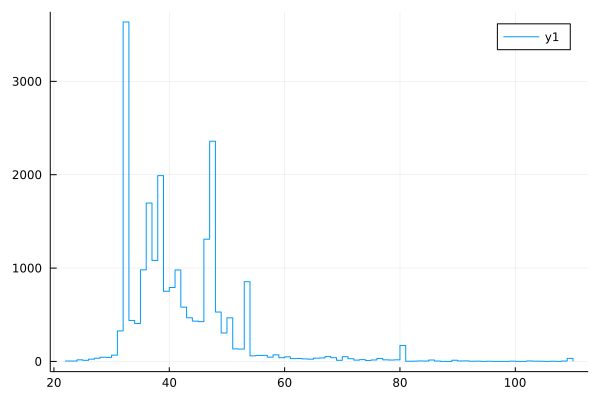

In [7]:
# Not resampled, not weighted for size of lat/long bin 
stephist(crustDistribution.depth[:,1])

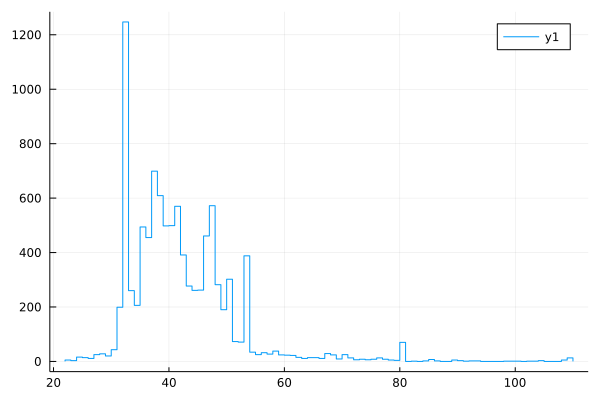

In [10]:
# Weighted for difference in lat/long size 
crusts = crustDistribution.getCrustParams(10000)
stephist(crusts[:,1])

In [171]:
# Weighted for difference in lat/long size + uncertainty
crusts = crustDistribution.getCrustParams(10000, uncertain=true)
stephist(crusts[:,1], label="Continental geotherms", ylabel="Frequency", yticks=false, xlabel="Depth to 550")
vline!(binbounds[2:end-1], label="Bin boundaries")
plot!(size=(400, 200), dpi=600, framestyle=:box)
savefig("../../thesis/figures/geotherm_bins.png")

# How different are samples modeled at each of these geotherms? 

In [41]:
vps = zeros(3, 100000, 10)
for i in 1:10
    vps[:,:,i] = h5read("../data/base/perplex_out_$i.h5", "results")[2:end,2,:]
end

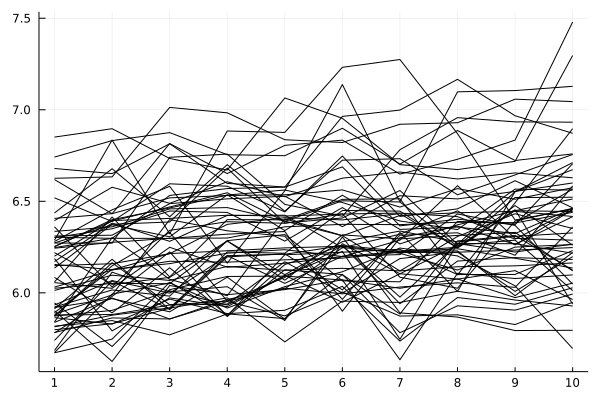

In [50]:
plot()
for i in 1:100
    if all(vps[2, i,:] .> 0)
        plot!(vps[2, i,:], color=:black)
    end
end
plot!(legend=false, xticks=1:10)
#savefig("../../thesis/figures/binned_vp.png")

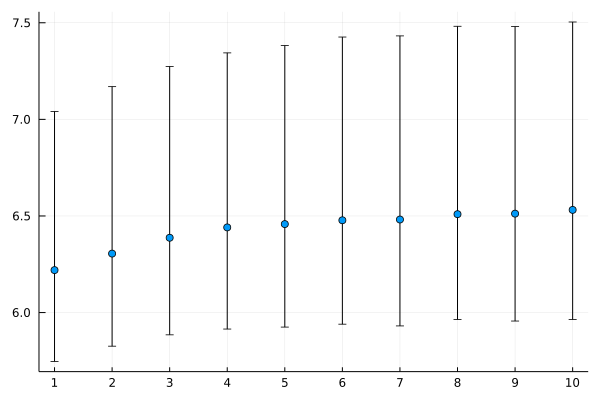

In [145]:
good = sum(vps, dims=1)

fifth = [percentile(vps[2, .!isnan.(good[:,:,i])[:], i], 10) for i in 1:10]

nintyfifth = [percentile(vps[2, .!isnan.(good[:,:,i])[:], i], 90) for i in 1:10]

median = [percentile(vps[2, .!isnan.(good[:,:,i])[:], i], 50) for i in 1:10]

scatter(1:10, median, yerr=(median .- fifth, nintyfifth .- median), xticks=1:10, legend=false)

97752
97191
95674
95433
95486
95817
96082
96169
96170
95981


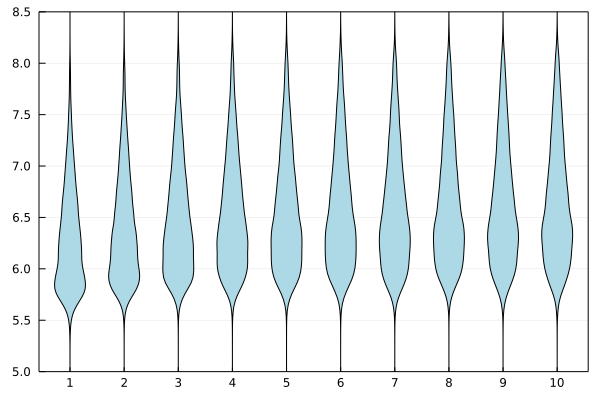

In [177]:
good = .! isnan.(sum(vps, dims=(1,3))[:])

violin()
for i in 1:10
    good = (.! isnan.(sum(vps[:,:,i], dims=(1))[:])) .& all(vps[:,:,i] .> 0, dims=1)[:]
    println(sum(good))
    violin!(repeat(["$i"], sum(good)), vps[2,good,i][:], color=:lightblue, leg=false)
end
plot!(ylims=(5.0,8.5), legend=false, framestyle=:box)

#scatter!(["i" for i in 1:10], median, yerr=(median .- fifth, nintyfifth .- median), xticks=1:10, legend=false)
#savefig("../../thesis/figures/binned_vp.png")

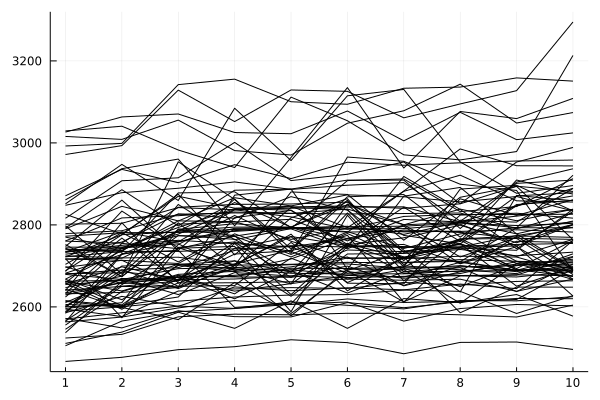

In [146]:
plot()
for i in 1:100
    if all(vps[1, i,:] .> 0)
        plot!(vps[1, i,:], color=:black)
    end
end
plot!(legend=false, xticks=1:10)
#savefig("../../thesis/figures/binned_rho.png")

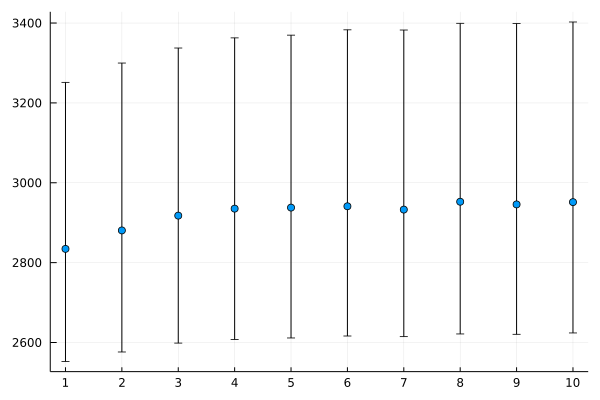

In [90]:
good = sum(vps, dims=1)

fifth = [percentile(vps[1, .!isnan.(good[:,:,i])[:], i], 5) for i in 1:10]

nintyfifth = [percentile(vps[1, .!isnan.(good[:,:,i])[:], i], 95) for i in 1:10]

median = [percentile(vps[1, .!isnan.(good[:,:,i])[:], i], 50) for i in 1:10]

scatter(1:10, median, yerr=(median .- fifth, nintyfifth .- median), xticks=1:10, legend=false)

97752
97191
95674
95433
95486
95817
96082
96169
96170
95981


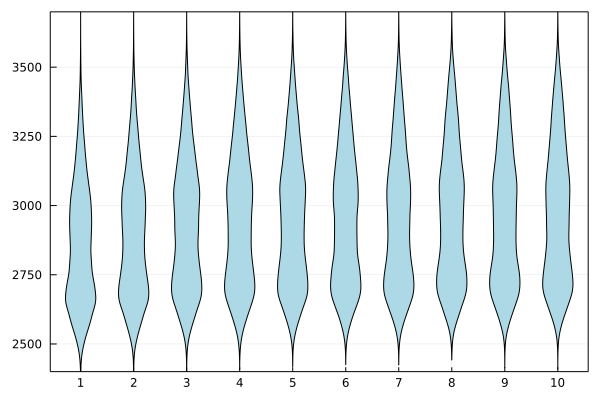

In [176]:
good = .! isnan.(sum(vps, dims=(1,3))[:])

violin()
for i in 1:10
    good = (.! isnan.(sum(vps[:,:,i], dims=(1))[:])) .& all(vps[:,:,i] .> 0, dims=1)[:]
    println(sum(good))
    violin!(repeat(["$i"], sum(good)), vps[1,good,i][:], color=:lightblue, leg=false)
end
plot!(ylims=(2400,3700), legend=false, framestyle=:box)
#savefig("../../thesis/figures/binned_rho.png")

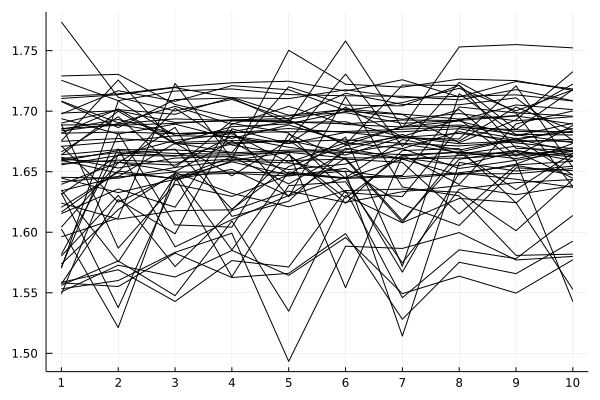

In [151]:
plot()
for i in 1:100
    if all(vps[3, i,:] .> 0)
        plot!(vps[3, i,:], color=:black)
    end
end
plot!(legend=false, xticks=1:10)
#savefig("../../thesis/figures/binned_vpvs.png")

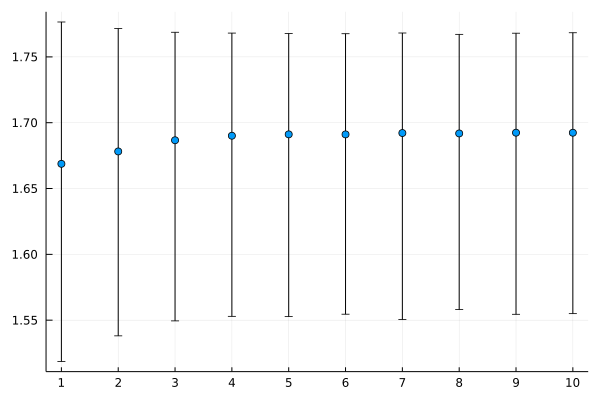

In [91]:
good = sum(vps, dims=1)

fifth = [percentile(vps[3, .!isnan.(good[:,:,i])[:], i], 5) for i in 1:10]

nintyfifth = [percentile(vps[3, .!isnan.(good[:,:,i])[:], i], 95) for i in 1:10]

median = [percentile(vps[3, .!isnan.(good[:,:,i])[:], i], 50) for i in 1:10]

scatter(1:10, median, yerr=(median .- fifth, nintyfifth .- median), xticks=1:10, legend=false)

97752
97191
95674
95433
95486
95817
96082
96169
96170
95981


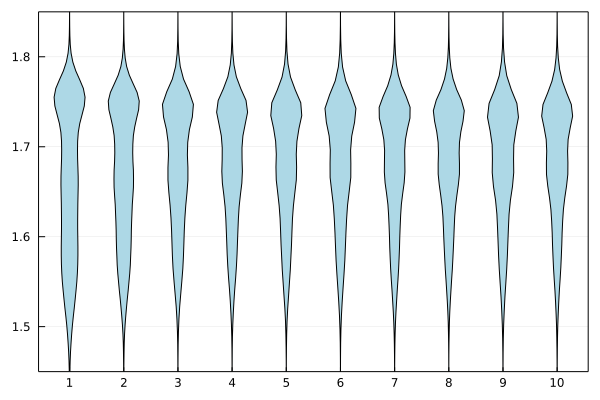

In [175]:
good = .! isnan.(sum(vps, dims=(1,3))[:])

violin()
for i in 1:10
    good = (.! isnan.(sum(vps[:,:,i], dims=(1))[:])) .& all(vps[:,:,i] .> 0, dims=1)[:]
    println(sum(good))
    violin!(repeat(["$i"], sum(good)), vps[3,good,i][:], color=:lightblue, leg=false)
end
plot!(ylims=(1.45,1.85), legend=false, framestyle=:box)
#savefig("../../thesis/figures/binned_vpvs.png")